# BRB Realty Investors :  King County Real Estate Modeling Project

by Rishi Ahuja | Bryan Keating | Brandon Menendez

![Seattle](seattle_skyline.jpeg)

## Data Understanding

#### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


%matplotlib inline

#### Exploring the King County Housing Dataset

In [2]:
house_df = pd.read_csv("data/kc_house_data.csv")

In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Filling in Nulls with Zero 

house_df.fillna(0, inplace=True)

In [6]:
#Converting dates into years

d =[]
for i in house_df['date'].values:
    d.append(i[-4:])
    
house_df['date'] = d

In [7]:
# Calculating price per living sq ft

house_df['ppf'] = house_df['price']/house_df['sqft_living']

In [8]:
# Checking unique IDs in dataset

house_df['id'].nunique()


21420

In [9]:
# Dropping duplicates and leaving the most recent sold price 

house_df.drop_duplicates(subset='id', keep = 'last', inplace = True)

In [10]:
house_df.nunique()

# Updated dataset now has 21,420 unique homes

id               21420
date                 2
price             3595
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           3
view                 6
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
ppf              16381
dtype: int64

In [11]:
# Looking at correlations between price and other columns

house_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
id,1.000000,-0.018450,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.011794,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429,-0.006833
price,-0.018450,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.604424,0.051012,0.118278,-0.051169,0.306439,0.019826,0.583792,0.082045,0.554108
bedrooms,0.000691,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,0.480242,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570,-0.207278
bathrooms,0.004343,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.686328,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760,-0.093894
sqft_living,-0.013451,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.876533,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837,-0.094694
sqft_lot,-0.132648,0.088789,0.032490,0.087779,0.172586,1.000000,-0.005561,0.183210,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.035697
floors,0.018139,0.254972,0.177734,0.501803,0.352868,-0.005561,1.000000,0.522751,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.001515
sqft_above,-0.011794,0.604424,0.480242,0.686328,0.876533,0.183210,0.522751,1.000000,0.422977,0.020078,-0.260803,-0.002040,0.344161,0.731887,0.194445,-0.091274
yr_built,0.021171,0.051012,0.155241,0.506252,0.316646,0.052312,0.488935,0.422977,1.000000,-0.203147,-0.346162,-0.148857,0.409173,0.324715,0.070125,-0.294758
yr_renovated,-0.010857,0.118278,0.017470,0.047686,0.050851,0.004991,0.003141,0.020078,-0.203147,1.000000,0.062291,0.027776,-0.064848,0.000812,0.004317,0.098979


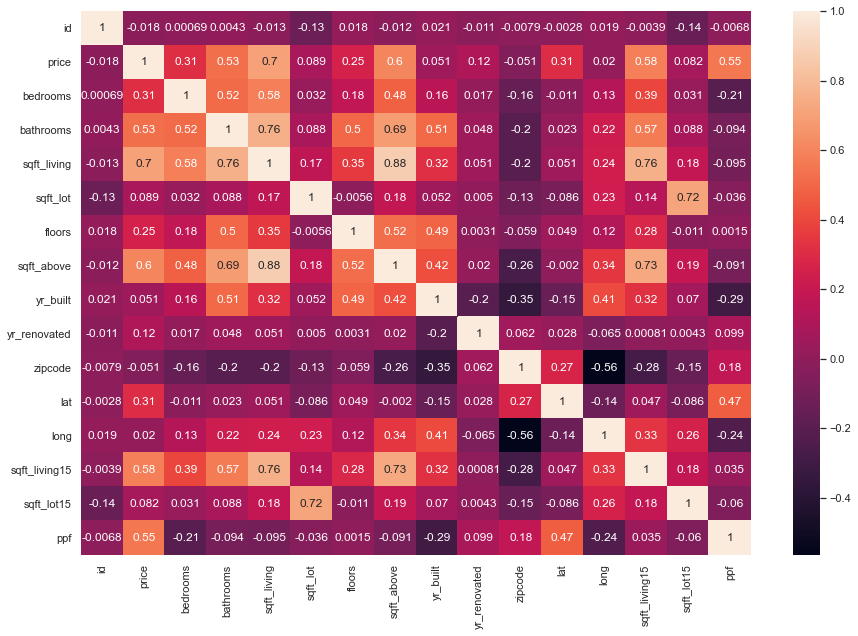

In [12]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.heatmap(house_df.corr(),annot=True
        );

## Data Preparation 

####  Taking a look at crime data and merging datasets as a potential model feature

In [13]:
crime_df = pd.read_csv("data/KCSO_Offense_Reports__2020_to_Present.csv")

crime_df.head()

/Users/brandonmenendez/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C20000090,12/27/2019 06:00:00 AM,23F,Theft From Motor Vehicle,13300 Block NEWCASTLE COMMONS DR,NEWCASTLE,WA,98059,Reporting Area H02003,District H2,3.0,01/01/2020 08:03:04 PM,01/01/2020 08:04:15 PM,6,6,12136416598
1,C20000045,12/31/2019 09:00:00 PM,290,Destruction/Damage/Vandalism of Property,10100 Block 8TH AVE S,SEATTLE,WA,98168,Reporting Area K07002,District K7,4.0,01/01/2020 10:45:27 AM,01/01/2020 10:47:23 AM,21,3,12135961258
2,C20000380,01/04/2020 01:08:00 AM,35B,Drug Equipment Violations,16500 Block INTERNATIONAL BLVD,SEATAC,WA,98188,Reporting Area L02003,District L2,4.0,01/04/2020 02:44:38 AM,01/04/2020 02:46:46 AM,1,7,12139600902
3,C20000144,01/02/2020 12:00:00 AM,23F,Theft From Motor Vehicle,11600 Block RAINIER AVE S,SEATTLE,WA,98178,Reporting Area K08005,District K8,4.0,01/02/2020 10:09:06 AM,01/02/2020 10:33:20 AM,0,5,12137075078
4,C20000796,01/06/2020 04:00:00 PM,23H,All Other Larceny,19700 Block 26TH AVE NW,SHORELINE,WA,98177,Reporting Area A01001,District A1,5.0,01/07/2020 01:19:32 PM,01/07/2020 01:25:00 PM,16,2,12148699229


In [14]:
# Transposing Zip Codes to get crime value counts

crimezip = pd.DataFrame([crime_df.zip]).transpose()

crimezip.head()

,zip
0,98059
1,98168
2,98188
3,98178
4,98177


In [15]:
crimezip.value_counts().head()

zip    
98188.0    2779
98168.0    2543
98133.0    2276
98166.0    2134
98042.0    2056
dtype: int64

In [16]:
# Cleaning zip code column for merge to house_df

crimezip['zip'] = crimezip['zip'].map(str)

s = crimezip['zip']
s= s.str.split('.', expand=True)
crimezip['zipn'] = s[0]

s.head()

,0,1
0,98059,0
1,98168,0
2,98188,0
3,98178,0
4,98177,0


In [17]:
ss = crimezip['zipn']
ss= ss.str.split('-', expand=True)
crimezip['zipnn'] = ss[0]

In [18]:
#Dropping null values from crimezip

crimezip['zipnn'].dropna()

0        98059
1        98168
2        98188
3        98178
4        98177
         ...  
54779    98001
54780    98058
54781    98188
54782    98133
54783    98065
Name: zipnn, Length: 54784, dtype: object

In [19]:
crimezip = crimezip.replace('nan','0', regex=True)
crimezip['zipnn'] = crimezip['zipnn'].astype(int)

unique_crime_zip = pd.DataFrame([crimezip.zipnn]).transpose()

unique_crime_zip.head()

,zipnn
0,98059
1,98168
2,98188
3,98178
4,98177


In [20]:
unique_crime_zip = crimezip['zipnn'].unique()
unique_df_zip = pd.DataFrame([house_df.zipcode]).transpose()

In [21]:
house_df = pd.merge(house_df,crimezip, how='left',left_on = 'zipcode', right_on = "zipnn", indicator=True)

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16918208 entries, 0 to 16918207
Data columns (total 26 columns):
 #   Column         Dtype   
---  ------         -----   
 0   id             int64   
 1   date           object  
 2   price          float64 
 3   bedrooms       int64   
 4   bathrooms      float64 
 5   sqft_living    int64   
 6   sqft_lot       int64   
 7   floors         float64 
 8   waterfront     object  
 9   view           object  
 10  condition      object  
 11  grade          object  
 12  sqft_above     int64   
 13  sqft_basement  object  
 14  yr_built       int64   
 15  yr_renovated   float64 
 16  zipcode        int64   
 17  lat            float64 
 18  long           float64 
 19  sqft_living15  int64   
 20  sqft_lot15     int64   
 21  ppf            float64 
 22  zip            object  
 23  zipn           object  
 24  zipnn          float64 
 25  _merge         category
dtypes: category(1), float64(8), int64(9), object(8)
memory usage: 3.3+ G

In [22]:
house_df.drop_duplicates(subset = 'id', inplace = True)

house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [23]:
# Renaming merge column for second merge 

zip_counts_df = pd.DataFrame([house_df['zipnn'].value_counts()]).transpose()

house_df.rename(columns = {'_merge':'Check'}, inplace = True)

In [24]:
# Setting conditions to create standard safety rating 

conditions = [
    (zip_counts_df['zipnn'] < 100),
    (zip_counts_df['zipnn'] >= 100) & (zip_counts_df['zipnn'] < 200),
    (zip_counts_df['zipnn'] >= 200) & (zip_counts_df['zipnn'] < 300),
    (zip_counts_df['zipnn'] >= 300) & (zip_counts_df['zipnn'] < 400),
    (zip_counts_df['zipnn'] >= 400) & (zip_counts_df['zipnn'] < 500),
    (zip_counts_df['zipnn'] >= 500) & (zip_counts_df['zipnn'] < 700)
]

values = ['5', '4', '3','2','1', '0']

zip_counts_df['Safety_Rating'] = np.select(conditions, values)

In [25]:
zip_counts_df.index.name="zipcodes"

zip_counts_df.head()

,zipnn,Safety_Rating
zipcodes,,
98103.0,600,0
98038.0,586,0
98115.0,576,0
98052.0,571,0
98117.0,548,0


In [26]:
#Bringing it all together 

zip_counts_df.rename(columns = {'zipnn':'n_zipnn'}, inplace = True)

house_df = pd.merge(house_df, zip_counts_df, how='left',left_on = 'zipnn', right_on = "zipcodes", indicator=True)

house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check,n_zipnn,Safety_Rating,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1340,5650,188.050847,98178.0,98178,98178.0,both,258.0,3,both
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,209.338521,98125.0,98125,98125.0,both,402.0,1,both
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,2720,8062,233.766234,98028.0,98028,98028.0,both,282.0,3,both
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,308.163265,98136.0,98136,98136.0,both,263.0,3,both
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,303.571429,98074.0,98074,98074.0,both,435.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,235.294118,98103.0,98103,98103.0,both,600.0,0,both
21416,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,173.160173,98146.0,98146,98146.0,both,281.0,3,both
21417,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,394.216667,98144.0,98144,98144.0,both,340.0,2,both
21418,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1410,1287,250.000000,98027.0,98027,98027.0,both,411.0,1,both


### Taking a look at school district rankings and merging to house_df as potential model feature

#### Grabbing and Preparing School District  from SchoolDigger API

In [27]:
## Note: Due to API constraints, need to load 5 seperate data pages to grab all relevant districts 


import requests

r_1 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=1&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_2 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=2&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_3 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=3&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_4 = requests.get('https://api.schooldigger.com/v1.2/rankings/districts/WA?page=4&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')
r_5 = requests.get('https://api.schooldigger.com/v2.0/rankings/districts/WA?page=5&perPage=50&appID=fdfc4b74&appKey=438e3232eb6b195a6341ce71bbc6ec1b')

districts_1 = r_1.json()
districts_2 = r_2.json()
districts_3 = r_3.json()
districts_4 = r_4.json()
districts_5 = r_5.json()

In [28]:
district_name = []
zip_code = []
rank = []
rank_star = []
county = []

for district in range(0,len(districts_1['districtList'])):
    district_name.append(districts_1['districtList'][district]['districtName'])
    zip_code.append(districts_1['districtList'][district]['address']['zip'])
    rank.append(districts_1['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_1['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_1['districtList'][district]['county']['countyName'])

In [29]:
district_name_2 = []
zip_code_2 = []
rank_2 = []
rank_star_2 = []
county_2 = []

for district in range(0,len(districts_2['districtList'])):
    district_name.append(districts_2['districtList'][district]['districtName'])
    zip_code.append(districts_2['districtList'][district]['address']['zip'])
    rank.append(districts_2['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_2['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_2['districtList'][district]['county']['countyName'])

In [30]:
district_name_3 = []
zip_code_3 = []
rank_3 = []
rank_star_3 = []
county_3 = []

for district in range(0,len(districts_3['districtList'])):
    district_name.append(districts_3['districtList'][district]['districtName'])
    zip_code.append(districts_3['districtList'][district]['address']['zip'])
    rank.append(districts_3['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_3['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_3['districtList'][district]['county']['countyName'])

In [31]:
district_name_4 = []
zip_code_4 = []
rank_4 = []
rank_star_4 = []
county_4 = []

for district in range(0,len(districts_4['districtList'])):
    district_name.append(districts_4['districtList'][district]['districtName'])
    zip_code.append(districts_4['districtList'][district]['address']['zip'])
    rank.append(districts_4['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_4['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_4['districtList'][district]['county']['countyName'])

In [32]:
district_name_5 = []
zip_code_5 = []
rank_5 = []
rank_star_5 = []
county_5 = []

for district in range(0,len(districts_5['districtList'])):
    district_name.append(districts_5['districtList'][district]['districtName'])
    zip_code.append(districts_5['districtList'][district]['address']['zip'])
    rank.append(districts_5['districtList'][district]['rankHistory'][0]['rank'])
    rank_star.append(districts_5['districtList'][district]['rankHistory'][0]['rankStars'])
    county.append(districts_5['districtList'][district]['county']['countyName'])

In [33]:
#Creating final df with school district ratings for merge to house_df

district_rankings_1 = {'name':district_name,'zip':zip_code,'rank':rank,'rank_star':rank_star,'county':county}
district_rankings_1 = pd.DataFrame(district_rankings_1)

district_rankings_2 = {'name':district_name_2,'zip':zip_code_2,'rank':rank_2,'rank_star':rank_star_2,'county':county_2}
district_rankings_2 = pd.DataFrame(district_rankings_2)

district_rankings_3 = {'name':district_name_3,'zip':zip_code_3,'rank':rank_3,'rank_star':rank_star_3,'county':county_3}
district_rankings_3 = pd.DataFrame(district_rankings_3)

district_rankings_4 = {'name':district_name_4,'zip':zip_code_4,'rank':rank_4,'rank_star':rank_star_4,'county':county_4}
district_rankings_4 = pd.DataFrame(district_rankings_4)

district_rankings_5 = {'name':district_name_5,'zip':zip_code_5,'rank':rank_5,'rank_star':rank_star_5,'county':county_5}
district_rankings_5 = pd.DataFrame(district_rankings_5)

districts = pd.concat([district_rankings_1, district_rankings_2,district_rankings_3,district_rankings_4,\
                       district_rankings_5], ignore_index=True)

In [34]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       239 non-null    object 
 1   zip        239 non-null    object 
 2   rank       239 non-null    float64
 3   rank_star  239 non-null    float64
 4   county     239 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.5+ KB


In [35]:
# Creating new df that only contains King County school district rankings 

kc_rankings = pd.DataFrame(districts[districts['county'] == 'King County'])
kc_rankings

,name,zip,rank,rank_star,county
1,Mercer Island School District,98040,2.0,5.0,King County
2,Lake Washington School District,98052,3.0,5.0,King County
5,Issaquah School District,98029,6.0,5.0,King County
8,Shoreline School District,98155,9.0,5.0,King County
9,Tahoma School District,98038,10.0,5.0,King County
11,Bellevue School District,98005,12.0,5.0,King County
15,Snoqualmie Valley School District,98065,16.0,5.0,King County
41,Riverview School District,98019,42.0,4.0,King County
47,Vashon Island School District,98070,48.0,4.0,King County
53,Seattle School District No. 1,98134,54.0,4.0,King County


#### Mapping Zip Codes to School Districts

In [36]:
zip_data = pd.read_csv('data/zip_sites_kc.csv')
zip_data.nunique()

X             653
Y             653
OBJECTID      654
FEATURE_ID    654
ESITE         635
CODE            7
NAME          636
ABB_NAME      593
ADDRESS       635
ZIPCODE        80
LONG_CEN      653
LAT_CEN       653
SCH_CLASS       2
DISTRICT       19
PIN           598
MAJOR         484
MINOR         307
FEATUREDES      7
OSPI_CODE     369
dtype: int64

In [37]:
# Condensing df to only include relevant columns 

zip_data = pd.DataFrame(zip_data[['ZIPCODE','DISTRICT']])
zip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ZIPCODE   654 non-null    int64 
 1   DISTRICT  654 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.3+ KB


In [38]:
zip_data.head()

,ZIPCODE,DISTRICT
0,98146,HIGHLINE
1,98034,LAKE WASHINGTON
2,98042,KENT
3,98011,NORTHSHORE
4,98074,LAKE WASHINGTON


In [39]:
house_df = house_df.merge(zip_data,how='inner',left_on='zipcode',right_on='ZIPCODE')
house_df.nunique()

house_df.drop_duplicates(subset='id',inplace=True)

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 218194
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21420 non-null  int64   
 1   date           21420 non-null  object  
 2   price          21420 non-null  float64 
 3   bedrooms       21420 non-null  int64   
 4   bathrooms      21420 non-null  float64 
 5   sqft_living    21420 non-null  int64   
 6   sqft_lot       21420 non-null  int64   
 7   floors         21420 non-null  float64 
 8   waterfront     21420 non-null  object  
 9   view           21420 non-null  object  
 10  condition      21420 non-null  object  
 11  grade          21420 non-null  object  
 12  sqft_above     21420 non-null  int64   
 13  sqft_basement  21420 non-null  object  
 14  yr_built       21420 non-null  int64   
 15  yr_renovated   21420 non-null  float64 
 16  zipcode        21420 non-null  int64   
 17  lat            21420 non-null 

In [40]:
# Cleaning district name in house_df in order to merge with KC rankings df


# Convert to title formatting
house_df['clean_dist'] = house_df['DISTRICT'].map(lambda x: x.title())


# Splitting out first word
house_df['clean_dist_2'] = house_df['clean_dist'].map(lambda x: x.split()[0])

house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipn,zipnn,Check,n_zipnn,Safety_Rating,_merge,ZIPCODE,DISTRICT,clean_dist,clean_dist_2
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,98178.0,both,258.0,3,both,98178,RENTON,Renton,Renton
7,4060000240,2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,98178,98178.0,both,258.0,3,both,98178,RENTON,Renton,Renton
14,4058801670,2014,445000.0,3,2.25,2100,8201,1.0,0,AVERAGE,...,98178,98178.0,both,258.0,3,both,98178,RENTON,Renton,Renton
21,2976800796,2014,236000.0,3,1.00,1300,5898,1.0,0,NONE,...,98178,98178.0,both,258.0,3,both,98178,RENTON,Renton,Renton
28,6874200960,2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,98178,98178.0,both,258.0,3,both,98178,RENTON,Renton,Renton


In [41]:
# Cleaning district name in KC rankings table 

kc_rankings['name_match'] = kc_rankings['name'].map(lambda x: x.split()[0])

kc_rankings.head()

,name,zip,rank,rank_star,county,name_match
1,Mercer Island School District,98040,2.0,5.0,King County,Mercer
2,Lake Washington School District,98052,3.0,5.0,King County,Lake
5,Issaquah School District,98029,6.0,5.0,King County,Issaquah
8,Shoreline School District,98155,9.0,5.0,King County,Shoreline
9,Tahoma School District,98038,10.0,5.0,King County,Tahoma


In [42]:
# Merging dfs 


house_df = house_df.merge(kc_rankings,how='left',left_on='clean_dist_2',right_on='name_match')

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21420 non-null  int64   
 1   date           21420 non-null  object  
 2   price          21420 non-null  float64 
 3   bedrooms       21420 non-null  int64   
 4   bathrooms      21420 non-null  float64 
 5   sqft_living    21420 non-null  int64   
 6   sqft_lot       21420 non-null  int64   
 7   floors         21420 non-null  float64 
 8   waterfront     21420 non-null  object  
 9   view           21420 non-null  object  
 10  condition      21420 non-null  object  
 11  grade          21420 non-null  object  
 12  sqft_above     21420 non-null  int64   
 13  sqft_basement  21420 non-null  object  
 14  yr_built       21420 non-null  int64   
 15  yr_renovated   21420 non-null  float64 
 16  zipcode        21420 non-null  int64   
 17  lat            21420 non-null  

In [43]:
# Dropping rows with null values for school district info 

house_df.dropna(axis=0,subset=['rank_star'],inplace=True)



In [44]:
house_df.drop_duplicates(subset='id',inplace=True)

In [45]:
# Creating bedroom score, as possible family friendly feature to include in final model 

conditions = [
    (house_df['bedrooms'] <= 1),
    (house_df['bedrooms'] == 2), 
    (house_df['bedrooms'] > 2) & (house_df['bedrooms'] <= 3 ),
    (house_df['bedrooms'] > 3),
    ]

values = ['0', '1', '2', '3']

house_df['bedroom_score'] = np.select(conditions, values)

house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,DISTRICT,clean_dist,clean_dist_2,name,zip_y,rank,rank_star,county,name_match,bedroom_score
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,RENTON,Renton,Renton,Renton School District,98057,145.0,2.0,King County,Renton,2
1,4060000240,2014,205425.0,2,1.00,880,6780,1.0,NO,NONE,...,RENTON,Renton,Renton,Renton School District,98057,145.0,2.0,King County,Renton,1
2,4058801670,2014,445000.0,3,2.25,2100,8201,1.0,0,AVERAGE,...,RENTON,Renton,Renton,Renton School District,98057,145.0,2.0,King County,Renton,2
3,2976800796,2014,236000.0,3,1.00,1300,5898,1.0,0,NONE,...,RENTON,Renton,Renton,Renton School District,98057,145.0,2.0,King County,Renton,2
4,6874200960,2015,170000.0,2,1.00,860,5265,1.0,NO,NONE,...,RENTON,Renton,Renton,Renton School District,98057,145.0,2.0,King County,Renton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2525049086,2014,2720000.0,4,3.25,3990,18115,2.0,NO,NONE,...,BELLEVUE,Bellevue,Bellevue,Bellevue School District,98005,12.0,5.0,King County,Bellevue,3
21416,2525049113,2014,1950000.0,4,3.50,4065,18713,2.0,NO,NONE,...,BELLEVUE,Bellevue,Bellevue,Bellevue School District,98005,12.0,5.0,King County,Bellevue,3
21417,3262300485,2015,2250000.0,5,5.25,3410,8118,2.0,0,NONE,...,BELLEVUE,Bellevue,Bellevue,Bellevue School District,98005,12.0,5.0,King County,Bellevue,3
21418,6447300365,2014,2900000.0,5,4.00,5190,14600,2.0,NO,FAIR,...,BELLEVUE,Bellevue,Bellevue,Bellevue School District,98005,12.0,5.0,King County,Bellevue,3


In [46]:
# Converting scores to int 

house_df.dropna(inplace=True)

house_df['Safety_Rating'] = house_df['Safety_Rating'].astype(int)
house_df['bedroom_score'] = house_df['bedroom_score'].astype(int)

In [47]:
house_df['date'] = house_df['date'].astype(int)

# Calculating age of home as potentital model feature

house_df['home_age'] = house_df['date'] - house_df['yr_built']

In [48]:
# Dropping extra columns 
house_df.drop(columns= ['zipn','_merge','rank','waterfront','Check','ZIPCODE','name','rank'],inplace=True)

house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20623 entries, 0 to 21370
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20623 non-null  int64  
 1   date           20623 non-null  int64  
 2   price          20623 non-null  float64
 3   bedrooms       20623 non-null  int64  
 4   bathrooms      20623 non-null  float64
 5   sqft_living    20623 non-null  int64  
 6   sqft_lot       20623 non-null  int64  
 7   floors         20623 non-null  float64
 8   view           20623 non-null  object 
 9   condition      20623 non-null  object 
 10  grade          20623 non-null  object 
 11  sqft_above     20623 non-null  int64  
 12  sqft_basement  20623 non-null  object 
 13  yr_built       20623 non-null  int64  
 14  yr_renovated   20623 non-null  float64
 15  zipcode        20623 non-null  int64  
 16  lat            20623 non-null  float64
 17  long           20623 non-null  float64
 18  sqft_l

In [49]:
# Converting grade into integer from float

house_df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '10 Very Good', '9 Better',
       '5 Fair', '4 Low', '11 Excellent', '12 Luxury', '13 Mansion',
       '3 Poor'], dtype=object)

In [50]:
house_df['grade_int'] = house_df['grade'].map(lambda x: x.split()[0])

In [51]:
house_df['grade_int'] = house_df['grade_int'].astype(int)

In [52]:
house_df.drop(columns='grade',inplace=True)

In [53]:
# Getting dummy values for categorical columns 

house_df = pd.get_dummies(house_df)

## Modeling 

In [54]:
# Using Pearson Coefs. to determine most correlated features to price 

price_corr = house_df.corr()['price'].map(abs).sort_values(ascending=False)

price_corr

price                   1.000000
sqft_living             0.700144
grade_int               0.668994
sqft_above              0.599189
sqft_living15           0.587982
                          ...   
sqft_basement_207.0     0.000254
sqft_basement_875.0     0.000191
sqft_basement_2196.0    0.000114
sqft_basement_1024.0    0.000041
county_King County           NaN
Name: price, Length: 483, dtype: float64

#### Observation:
Since sqft_living seems to be most correlated, we want to see how well a simple linear regression model based on sqft living will do at predicting prices

In [56]:
# Grabbing model summary from OLS

x = house_df.drop('price', axis=1)
y = house_df['price']

model = sm.OLS(endog=y,exog=x).fit()


### Model 1 - SQFT Living

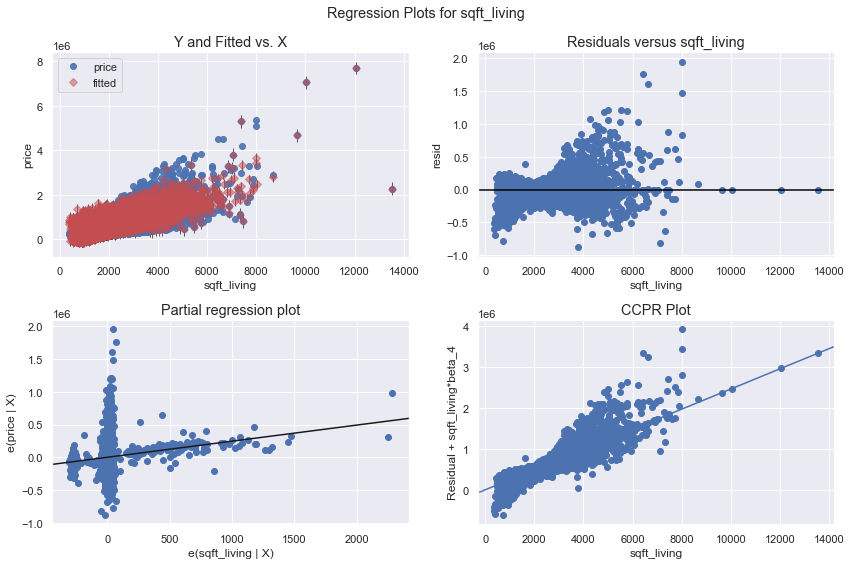

In [57]:
#Plotting Model 

sm.graphics.plot_regress_exog(model, 'sqft_living',  fig=plt.figure(figsize=(12, 8)));

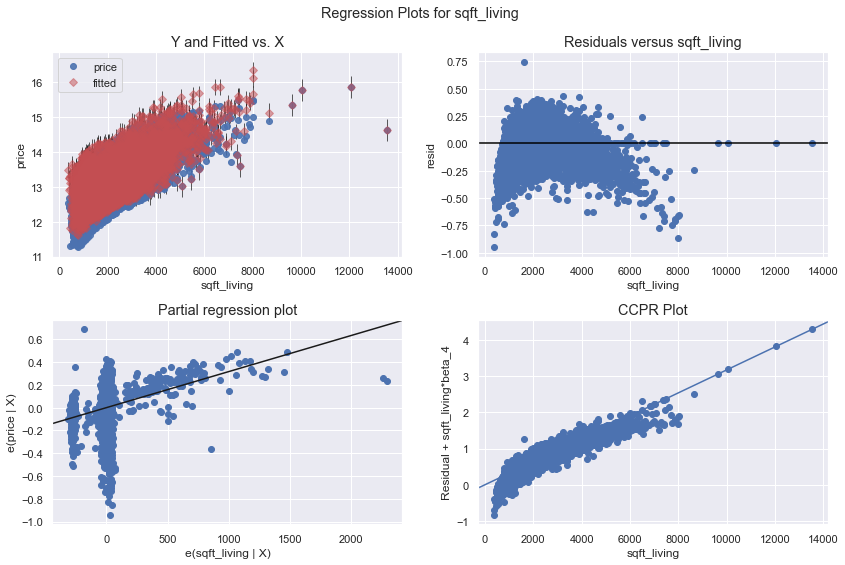

In [58]:
# Plotting model with a log scale for comparison 

y_scld = np.log(y)

model_log = sm.OLS(y_scld,x).fit()

sm.graphics.plot_regress_exog(model_log, 'sqft_living',  fig=plt.figure(figsize=(12, 8)));

#### Observations:
- These plots confrim that sqft living and price seem to be highly correlated


In [59]:
# Earlier exploration of data in scratch notebook showed a home with 33 bedrooms, and the next closest 
# is 11 bedrooms. We will consider this an outlier and remove from dataset to ensure it doesnt skew our model

house_df.sort_values(by='bedrooms',ascending=False,inplace =True)
house_df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,...,name_match_Kent,name_match_Lake,name_match_Mercer,name_match_Renton,name_match_Riverview,name_match_Seattle,name_match_Shoreline,name_match_Snoqualmie,name_match_Tahoma,name_match_Vashon
5368,2402100895,2014,640000.0,33,1.75,1620,6000,1.0,1040,1947,...,0,0,0,0,0,1,0,0,0,0


In [60]:
house_df.drop(axis=0,index=5368,inplace=True)
house_df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,...,name_match_Kent,name_match_Lake,name_match_Mercer,name_match_Renton,name_match_Riverview,name_match_Seattle,name_match_Shoreline,name_match_Snoqualmie,name_match_Tahoma,name_match_Vashon
20367,1773100755,2014,520000.0,11,3.0,3000,4960,2.0,2400,1918,...,0,0,0,0,0,1,0,0,0,0


In [61]:
# Testing Model 1 - our baseline model

from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()

X_train = house_df.drop('price',axis=1)
y_train = house_df['price']
most_correlated_feature = "sqft_living"

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator= baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48961071834000297
Validation score: 0.4915552968074978


#### Observation:

- This model explains about 48% of the variance in home prices. We are going to continue to look for more features that will improve the model

### Model 2 - Numeric Values

In [62]:
# Grabbing most correlated numeric features from house_df

X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric[['bedrooms','sqft_living','sqft_lot','floors','grade_int','home_age','yr_built'\
                ,'Safety_Rating','bedroom_score','rank_star']]

,bedrooms,sqft_living,sqft_lot,floors,grade_int,home_age,yr_built,Safety_Rating,bedroom_score,rank_star
20367,11,3000,4960,2.0,7,96,1918,2,3,4.0
11467,10,2920,3745,2.0,7,101,1913,3,3,4.0
18364,10,3610,11914,2.0,7,56,1958,1,3,5.0
13598,10,4590,10920,1.0,9,6,2008,2,3,5.0
5085,9,3830,6988,2.5,7,76,1938,0,3,4.0
...,...,...,...,...,...,...,...,...,...,...
21000,1,960,40946,1.0,5,69,1945,4,0,4.0
4651,1,640,10280,1.0,5,94,1920,2,0,4.0
20997,1,3000,204732,2.5,8,35,1979,4,0,4.0
2109,1,2060,10600,1.5,7,87,1927,3,0,1.0


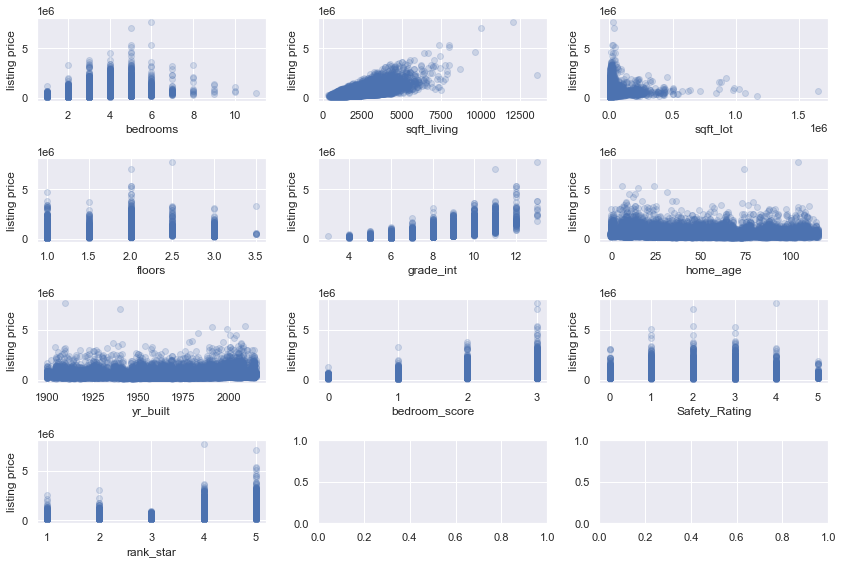

In [63]:
# Identifying correlations from features with scatterplots 

scatterplot_data = X_train_numeric[['bedrooms','sqft_living','sqft_lot','floors','grade_int','home_age','yr_built'\
                ,'bedroom_score','Safety_Rating','rank_star']]

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")



#### Observation:
- There are clear positive linear relationships between price and sqft_living, grade_int, and bedroom score
- We will continue to iterate on this model to compare to our baseline

In [64]:
# Testing second model and comparing to baseline  

X_train_second_model = scatterplot_data.copy()

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6579355545799691
Validation score: 0.6607120228237067

Baseline Model
Train score:      0.48961071834000297
Validation score: 0.4915552968074978


#### Observation
- It appears that this model explains roughly 15% more variance that our original model 
- We will need to keep identifying other features with a third model and test this model for potential multicollinearity 

In [65]:
# Model 2 Summary

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     3978.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:55:51   Log-Likelihood:            -2.8201e+05
No. Observations:               20622   AIC:                         5.640e+05
Df Residuals:                   20611   BIC:                         5.641e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.413e+07    6.3e+06     -8.587      0.000   -6.65e+07   -4.18e+07
bedrooms      -2107.8326   4108.324     -0.513      0.608   -1.02e+04    5944.807
sqft_living     205.1843      2.939     69.825      0.000     199.425     210.944
sqft_lot         -0.3164      0.036     -8.836      0.000      -0.387      -0.246
floors         2.406e+04   3273.504      7.349      0.000    1.76e+04    3.05e+04
grade_int      1.182e+05   2152.812     54.913      0.000    1.14e+05    1.22e+05
home_age       2.983e+04   3129.980      9.530      0.000    2.37e+04     3.6e+04
yr_built       2.634e+04   3129.290      8.419      0.000    2.02e+04    3.25e+04
bedroom_score -5.492e+04   5084.824    -10.800      0.000   -6.49e+04   -4.49e+04
Safety_Rating  1.185e+04   1157.474     10.236      0.000    9578.865    1.41e+04
rank_star      5.315e+04   1109.027     47.927      0.000     5.1e+04    5.53e+04
==============================================================================
Omnibus:                    17344.142   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1410204.800
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      42.875   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Fit Model 2 

second_model_final = second_model.fit(X_train_second_model,y_train)

#### Observation:
- Due to the large condition number, this suggests our second model has strong multicollinearity 
- Therefore, we will create a third model based on the most significant features based on the t-statistic in the summary above 

In [67]:
# We are going to use sklearn.feature_selection to see if there are  possible correlations we are missing
# before moving on to model 3

from itertools import combinations

features = ['sqft_living','sqft_lot','floors','grade_int','home_age','yr_built','Safety_Rating'\
           ,'bedroom_score','rank_star']

# Make a dataframe to hold the results (not strictly necessary
# but it makes the output easier to read)
results_df = pd.DataFrame(columns=features)

# Selecting just piece_count
results_df = results_df.append({
    "train_score": baseline_scores["train_score"].mean(),
    "val_score": baseline_scores["test_score"].mean()
}, ignore_index=True)

# Selecting 1 additional feature
for feature in features[1:]:
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    # Note: this technique of appending to a df is quite inefficient
    # Here it works because it's only happening 6 times, but avoid
    # doing this for a whole dataset
    results_df = results_df.append({
        feature: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Selecting 2 additional features
for (feature1, feature2) in list(combinations(features[1:], 2)):
    scores = cross_validate(
        estimator=second_model,
        X=X_train[["sqft_living", feature1, feature2]],
        y=y_train,
        return_train_score=True,
        cv=splitter
    )
    results_df = results_df.append({
        feature1: "Yes",
        feature2: "Yes",
        "train_score": scores["train_score"].mean(),
        "val_score": scores["test_score"].mean()
    }, ignore_index=True)
    
# Including all 3 additional features
results_df = results_df.append({
    "min_age": "Yes", "max_age": "Yes", "difficulty_level": "Yes",
    "train_score": second_model_scores["train_score"].mean(),
    "val_score": second_model_scores["test_score"].mean()
}, ignore_index=True)

# Fill in remaining values where appropriate
results_df["sqft_living"] = "Yes"
results_df.fillna("No", inplace=True)

results_df.sort_values(by='train_score',ascending=False).head()

,sqft_living,sqft_lot,floors,grade_int,home_age,yr_built,Safety_Rating,bedroom_score,rank_star,train_score,val_score,difficulty_level,max_age,min_age
37,Yes,No,No,No,No,No,No,No,No,0.657936,0.660712,Yes,Yes,Yes
22,Yes,No,No,Yes,Yes,No,No,No,No,0.605807,0.609090,No,No,No
23,Yes,No,No,Yes,No,Yes,No,No,No,0.605528,0.608733,No,No,No
30,Yes,No,No,No,Yes,No,No,No,Yes,0.583423,0.585408,No,No,No
33,Yes,No,No,No,No,Yes,No,No,Yes,0.583241,0.585175,No,No,No


### Model 3 - Significant Features 

In [68]:
# Creating variable with significant features

significant_features = ['Safety_Rating','home_age','sqft_living','rank_star']

In [69]:
# Creating Model 3 

third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())



Current Model
Train score:      0.586297605706108
Validation score: 0.5880178088412167

Second Model
Train score:      0.6579355545799691
Validation score: 0.6607120228237067

Baseline Model
Train score:      0.48961071834000297
Validation score: 0.4915552968074978


#### Observation:
- At first glance it appears our third model explains even less variance than our second, but these numbers to do not account for  multicollinearity 

In [70]:
# Model 3 summary 
sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     7320.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        15:55:53   Log-Likelihood:            -2.8398e+05
No. Observations:               20622   AIC:                         5.680e+05
Df Residuals:                   20617   BIC:                         5.680e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.155e+05   7118.699    -58.361      0.000   -4.29e+05   -4.02e+05
Safety_Rating  1.496e+04   1264.446     11.835      0.000    1.25e+04    1.74e+04
home_age       2256.4885     57.552     39.208      0.000    2143.682    2369.296
sqft_living     280.6487      1.884    149.003      0.000     276.957     284.340
rank_star       6.68e+04   1193.665     55.960      0.000    6.45e+04    6.91e+04
==============================================================================
Omnibus:                    15287.307   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           740765.463
Skew:                           3.080   Prob(JB):                         0.00
Kurtosis:                      31.708   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Fitting third model 

third_model_final = sm.OLS(y_train, sm.add_constant(X_train_third_model)).fit()

#### Observation:
- While there still may be some multicollinearity issues, it is much smaller than before. We will continue to test and validate this model 

#### To further test our model, we are going to do a train-test split on Model 3

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate


y = house_df['price']
X = house_df[['sqft_living','rank_star','home_age',]]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42
)

In [73]:
#checking columns
len(X_test.columns)

3

In [74]:
display(X_train.head())
display(X_test.head())

,sqft_living,rank_star,home_age
15656,1940,4.0,60
8749,1070,4.0,107
15597,1500,4.0,67
5146,2160,4.0,74
20418,1060,4.0,31


,sqft_living,rank_star,home_age
6793,2190,1.0,19
10793,2960,1.0,28
2759,1400,1.0,58
1617,3300,5.0,0
21156,2630,2.0,56


In [75]:
# Validating test and train data have the same shape 

print(X_train.shape)
print(X_test.shape)

print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

(15466, 3)
(5156, 3)
True
True


In [76]:
# Fitting model 

lr = LinearRegression()

train_test_model = lr.fit(X_train, y_train)

In [77]:
#R^2 of the training data
lr.score(X_train, y_train)

0.5793166249942594

In [78]:
#R^2 of the test data


lr.score(X_test, y_test)

0.5994249685911912

#### Observation:
- Our test and train scores are close
- Now we have to test for multicollinearity before feeling comfortable moving forward with this model

In [79]:
# testing multicollinearity using VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.Series(vif, index=X_train.columns, name="Variance Inflation Factor")

sqft_living    4.416759
rank_star      5.635129
home_age       2.404390
Name: Variance Inflation Factor, dtype: float64

#### Observation:
- Since these VIF numbers are around or less than 5, we feel comfortable with moving forward with our third model

## Visualizations for Presentation

Text(0.5, 1.0, 'School District Rating v. Home Price')

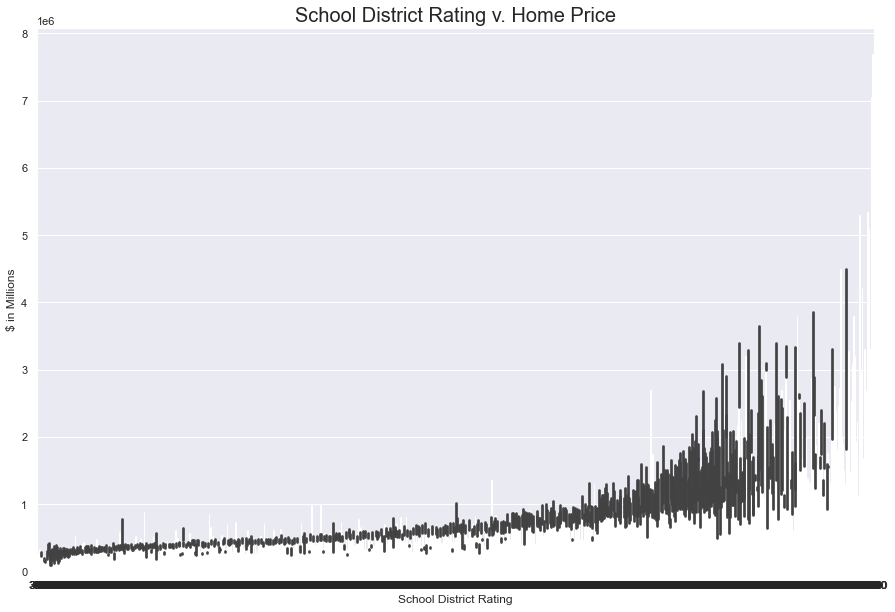

In [80]:
# Plotting school district rating v. home price 

ax = sns.barplot(x= house_df['sqft_living'], y=house_df['price'])


ax.set_xlabel('School District Rating')
ax.set_ylabel('$ in Millions')
ax.set_title('School District Rating v. Home Price',fontsize=20)

Text(0.5, 1.0, 'Safety Rating v. Home Price')

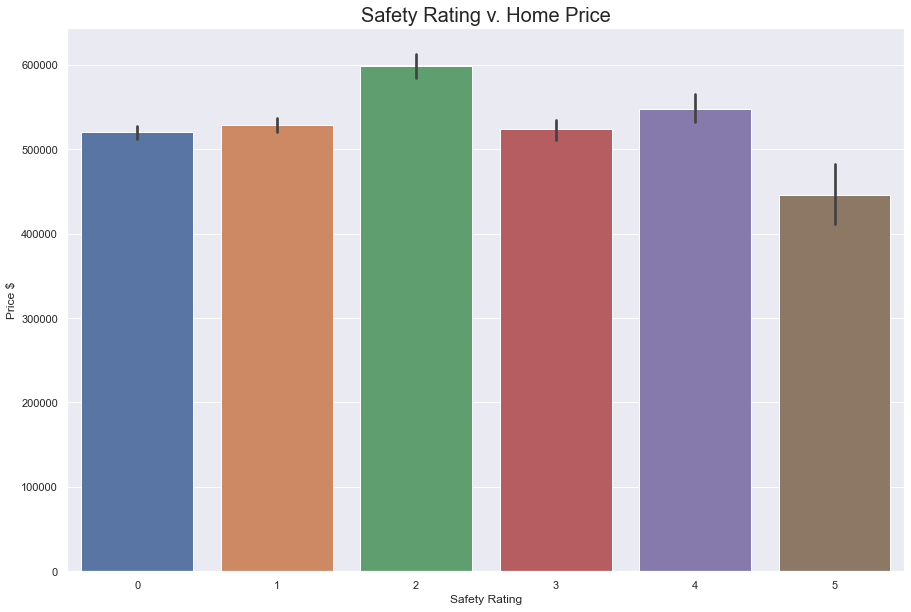

In [81]:
# Plotting safety rating v. home price 


ax = sns.barplot(x= house_df['Safety_Rating'], y=house_df['price'])

sns.color_palette("crest", as_cmap=True)
ax.set_xlabel('Safety Rating')
ax.set_ylabel('Price $')
ax.set_title('Safety Rating v. Home Price',fontsize=20)

Text(0.5, 1.0, 'Age of Home v. Price')

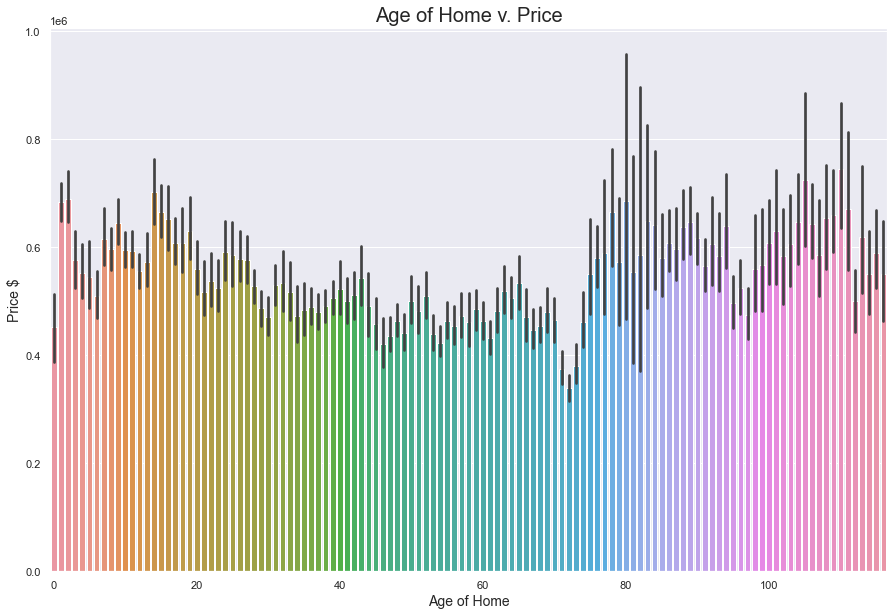

In [82]:
# Plotting home age v. Home price 

ax = sns.barplot(x= house_df['home_age'], y=house_df['price'])


import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

sns.set_style('whitegrid')

sns.color_palette("crest", as_cmap=True)
ax.set_xlabel('Age of Home',fontsize=14)
ax.set_ylabel('Price $',fontsize=14)
ax.set_title('Age of Home v. Price',fontsize=20)

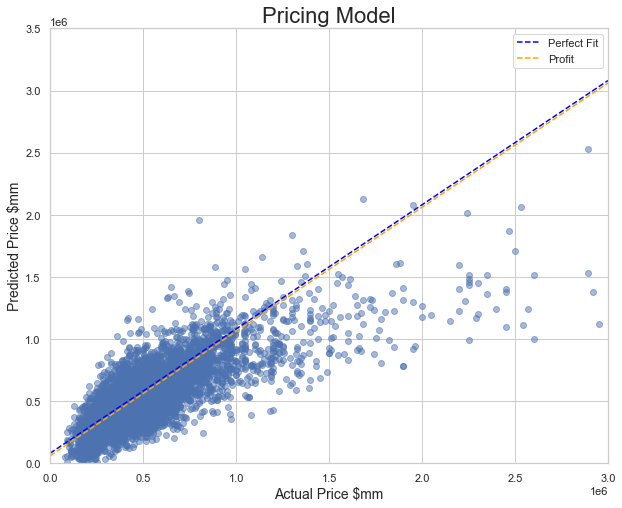

In [83]:
# Plotting our final model linear regression, with ROI profit line of 9%

preds_adj = train_test_model.predict(X_test)
fig, ax = plt.subplots(figsize=(10,8))

perfect_line = np.arange(y_test.min(), y_test.max())
profit_line = np.arange(y_test.min()*.75, y_test.max())
                         
ax.plot(perfect_line, linestyle="--", color="blue", label="Perfect Fit")
ax.plot(profit_line, linestyle="--", color="orange", label="Profit")

                        
# ax.set_yscale("log")
# ax.set_xscale("log")


plt.xlim([0, 3000000])
plt.ylim([0, 3500000])



ax.set_title("Pricing Model",fontsize=22)
ax.scatter(y_test, preds_adj, alpha=0.5)
ax.set_xlabel("Actual Price $mm",fontsize=14)
ax.set_ylabel("Predicted Price $mm",fontsize=14)
ax.legend();

## Recommendations

In addition to square foot living the most important features to consider are:
- School Rating 
- Safety Rating
- Home Age 


Further, with continued exploration, we recommend focusing on the data points under our profit line - especially those with High Safety Rating, High School Rating, and High Grade scores.

### Limitations and Next Steps

**Limitations**
- We weren’t able to tie in pop data to crime, so highly populated areas are going to seem more dangerous, and we did not distinguish between types of crime (petty theft v assault for example)
- Our data was outdated (2014-2015) and does not properly accoutn for currrent market trends
- To make this model more accurate, we would need at least 5-10 years worth of data 

**Normality**
- Does a good job at explaining price within 2 std of the mean, so homes priced between 425K and 655K You can see as the price increases, so does variance

**Next Steps**
- Compare linear Data 

- Further Investigate Safety Data 

- Consider the cost of construction/ renovation vs. current value 

- Explore Date of construction with cost of construction vs. current value 

